<h1 style="text-align:center;">Computational Intelligence</h1>
<h4 style="text-align:center;">by H. Naderan</h4>
<h5 style="text-align:center;">
Mechanical Engineering Department<br>
Amirkabir University of Technology
</h5>

***

## Simple polynomial regression

### Introduction
A model can be represented mathematically in the following form:
$$
    \mathbf{y} = \mathbf{f}\left(\mathbf{x}; \bm{\theta}, \bm{\lambda}\right)
$$
in which:
* $\mathbf{x}$ : *features* vector
* $\mathbf{y}$ : *labels* vector
* $\bm{\theta}$ : model's *parameters* vector
* $\bm{\lambda}$ : model's *hyperparameters* vector

**Supervised learning** is the process of determining model parameters ($\bm{\theta}$) so that the model estimates the data the best way it can.



### Polynomial regression
In polynomial regression, the function used as the model is a polynomial of degree $m$.
$$
    y = p(x) = p_0 + p_1 x + ... + p_{m} x^m
$$

Obviously a such polynomial cannot pass the points if $N>m$ so we want to find the best polynomial fit to this data. The closeness of the polynomial is measured by the *Mean Square Error (MSE)* or the *Mean Square Deviation (MSD)* of the data defined as:

$$
    MSE = \frac{1}{N}\sum_{j = 1}^{N} \left(y_j - p\left(x_j\right)\right)^2
$$

We want to find the coefficients of $p$ such that it is the *best fit* to the data or in mathematical terms, minimize the MSE. To do this the derivative of MSE with respect to $p_i$ is set to zero.

$$
    \frac{\partial}{\partial p_i} MSE= 0
$$

Performing the operations and simplifying the resulting equations gives:

$$
    \mathbf{X}^\mathtt{T}\mathbf{X}\mathbf{p} = \mathbf{X}^\mathtt{T}\mathbf{y}
$$ (lsq)

in which $\mathbf{X}$ is the **Vandermonde** matrix defined as:

$$
    X = \begin{bmatrix}
        1 & x_1 & x_1^2 & \cdots & x_1^m \\
        1 & x_2 & x_2^2 & \cdots & x_2^m \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & x_N & x_N^2 & \cdots & x_N^m
    \end{bmatrix}
$$

By solving the linear system of equations [](lsq) the vector $\mathbf{p}$ is obtained. This is called the *Least Square* regression.

### Libraries
Let's start by importing the required libraries.

* **Numpy** : for numerical calculations
* **Matplotlib.pyplot** : for plotting
* **Pandas** : for data handling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Read the sample data file. The file is available at [github](https://github.com/hmdnt/ComputationalIntelligence/blob/main/Polynomial%20regression/Polynomial%20regression%20-%20Data.csv)

In [2]:
df = pd.read_csv("Polynomial regression - Data.csv")

### Data inspection
Let's plot the data to see how it is 

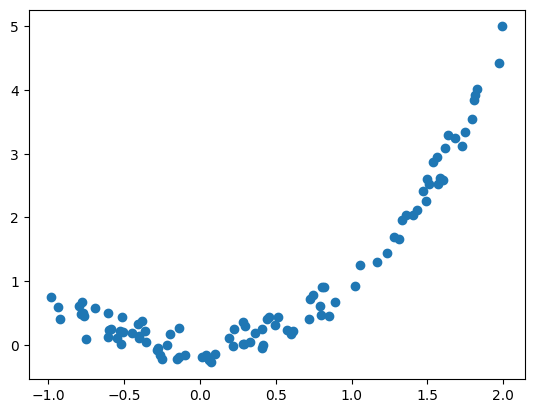

In [3]:
fig1, ax1 = plt.subplots(1)
x, y = df.x, df.y
N = df.shape[0]
ax1.plot(x, y, 'o')

### A naive approach
As a naive approach, we fit a polynomial of degree 2 to the data. For this we use the `Polynomial` object from `numpy` which has a least square `fit` method. Note that the coefficients of the `Polynomial` object are given in descending order.

In [4]:
p = np.polynomial.polynomial.Polynomial.fit(x, y, 2)
p.coef

array([0.2292344 , 1.79079342, 2.45928384])

Comparing the *fitted* model to the data:

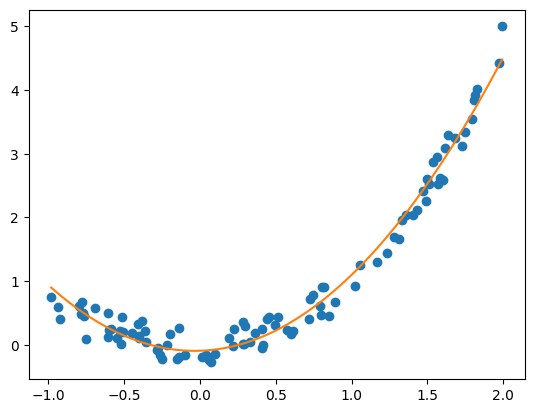

In [5]:
xrange = (min(x), max(x))
xs = np.linspace(*xrange, 100)
ys = p(xs)
ax1.plot(xs, ys)
fig1

Defining the `mse` function to measure the error

In [6]:
mse = lambda x, y : ((x - y)**2).mean()

gives

In [7]:
print(mse(y, p(x)))

0.03413268849284793


### Model validation
The problem with the mentioned approach is that there is no way to assess the *generalization* capability of the model. In order to estimate the generalization error of the model, it must be *tested* on *unseen* data. To achieve this, the data is split to *training* data and *test* data. Generally a 80%-20% split is a good choice.

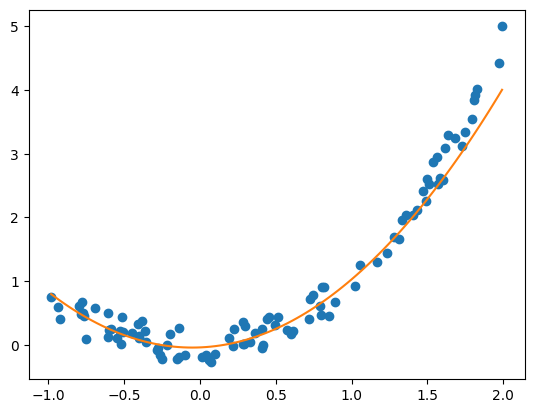

In [8]:
q = 80
Ntrn = N*q//100
xtrn,  ytrn = x[:Ntrn], y[:Ntrn]
xtst, ytst = x[Ntrn:], y[Ntrn:]
ptrn = np.polynomial.polynomial.Polynomial.fit(xtrn, ytrn, 2)
fig2, ax2 = plt.subplots(1)
ax2.plot(x, y, 'o', xs, ptrn(xs))

In [9]:
print("training error :", mse(ytrn, ptrn(xtrn)))

training error : 0.02648111183490707


In [10]:
print("test error :", mse(ytst, ptrn(xtst)))

test error : 0.18874301270943541


### Model selection
We used the 2nd order polynomial for our model but is it a good choice? The process of *model selection* is to find the best model that matches our data. Usually this means *hyperparameter* tuning.

To do this efficiently, we define the `fit_model` function to do the polynomial fit and return the training and test mse.

In [11]:
def fit_model(x, y, m, qtr = 80):
    N = x.size
    mtrn = N*qtr//100
    p = np.polynomial.polynomial.Polynomial.fit(x[:mtrn], y[:mtrn], m)
    etrn = mse(y[:mtrn], p(x[:mtrn]))
    etst = mse(y[mtrn:], p(x[mtrn:]))
    return p, etrn, etst
    


So, for a 3rd order fit we write:

In [12]:
fit_model(x, y, 3)

(Polynomial([0.02868013, 0.58505846, 1.41076842, 0.10798419], domain=[-0.97932522,  1.43358207], window=[-1.,  1.], symbol='x'),
 np.float64(0.02620392867850222),
 np.float64(0.10905514672254464))

To do a model selection analysis, we create and measure the error of different models ranging from 0th to 9th degree.

In [13]:
M = 9
etrn = np.zeros(M)
etst = np.zeros(M)
for m in range(M):
    p, etrn[m], etst[m] = fit_model(x, y, m)

print(pd.DataFrame(data = {'mse_train': etrn, 'mse_test': etst}))

   mse_train   mse_test
0   0.312012   8.365416
1   0.200079   4.478878
2   0.026481   0.188743
3   0.026204   0.109055
4   0.025980   0.301491
5   0.024574   0.940842
6   0.024564   1.511365
7   0.023644  20.436204
8   0.023643  16.126705


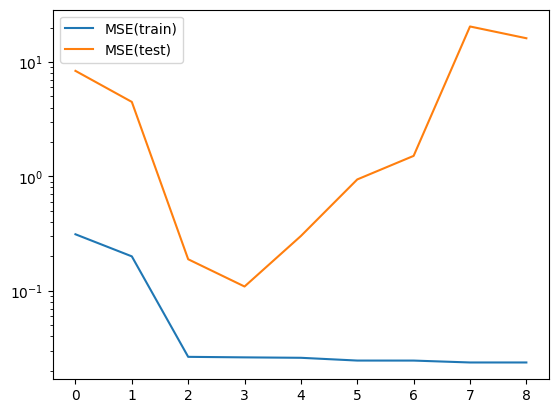

In [14]:
plt.plot(range(M), etrn, range(M), etst)
plt.yscale("log")
plt.legend(["MSE(train)", "MSE(test)"])

### Model selection validation
The problem is that we cannot test the selected model on unseen data. The practice is to split the data to *three* parts:
* Training data (70%)
* Validation data (15%)
* Test data (15%)


In [15]:
q = 85
Ntrn = N*q//100
xtrn,  ytrn = x[:Ntrn], y[:Ntrn]
xtst, ytst = x[Ntrn:], y[Ntrn:]
etrn = np.zeros(M)
evld = np.zeros(M)
p = [None for _ in range(M)]
for n in range(M):
    p[n], etrn[n], evld[n] = fit_model(xtrn, ytrn, n, 85)

print(pd.DataFrame(data = {'mse_train': etrn, 'mse_test': etst}))

   mse_train   mse_test
0   0.104911   8.365416
1   0.099616   4.478878
2   0.028269   0.188743
3   0.028131   0.109055
4   0.026873   0.301491
5   0.026397   0.940842
6   0.025423   1.511365
7   0.025384  20.436204
8   0.025373  16.126705


In [16]:
print("MSE for m = 2 : ", mse(ytst, p[2](xtst)))
print("MSE for m = 3 : ", mse(ytst, p[3](xtst)))
print("MSE for m = 4 : ", mse(ytst, p[4](xtst)))

MSE for m = 2 :  0.3009142270493219
MSE for m = 3 :  0.08088686802548294
MSE for m = 4 :  9.397680026646315


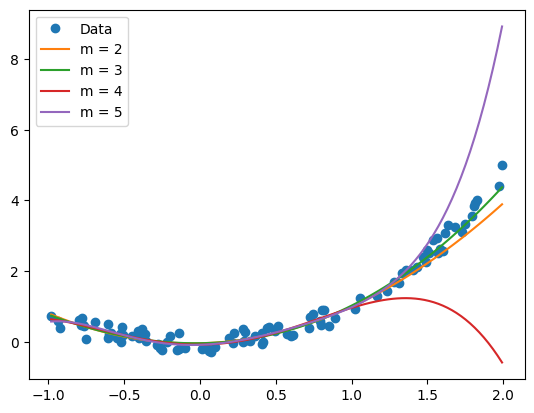

In [17]:
plt.plot(x, y, 'o', label = "Data")
plt.plot(xs, p[2](xs), label = "m = 2")
plt.plot(xs, p[3](xs), label = "m = 3")
plt.plot(xs, p[4](xs), label = "m = 4")
plt.plot(xs, p[5](xs), label = "m = 5")
plt.legend()

### Conclusion
What is your conclusion?